In [398]:
library(quantmod)
library(tidyverse)

library(readxl)
library(lmtest) 
library(forecast)
library(DIMORA)

library(fpp2)

library(sm)
library(splines)
library(gam)

library(tree)
library (gbm)

In [399]:
stock_list <- c("CL=F")

In [400]:
start_date <- Sys.Date()-(365*22)
end_date <- Sys.Date()
master_df <- NULL

for (idx in seq(length(stock_list))){
  stock_index = stock_list[idx]
  getSymbols(stock_index, verbose = TRUE, src = "yahoo", 
             from=start_date,to=end_date)
  temp_df = as.data.frame(get(stock_index))
  temp_df$Date = row.names(temp_df)
  temp_df$Index = stock_index
  row.names(temp_df) = NULL
  colnames(temp_df) = c("Open", "High", "Low", "Close", 
                        "Volume", "Adjusted", "Date", "Index")
  temp_df = temp_df[c("Date", "Index", "Open", "High", 
                      "Low", "Close", "Volume", "Adjusted")]
  master_df = rbind(master_df, temp_df)
}




downloading  CL=F .....

done.


Warning message:
“CL=F contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


In [401]:
write.csv(master_df,"stockprices.csv", row.names = TRUE)

In [402]:
crudeoil<- read.csv("stockprices.csv")
crudeoil<- na.omit(crudeoil)
str(crudeoil)

'data.frame':	5522 obs. of  9 variables:
 $ X       : int  1 2 3 5 6 7 8 9 10 11 ...
 $ Date    : chr  "2001-01-10" "2001-01-11" "2001-01-12" "2001-01-16" ...
 $ Index   : chr  "CL=F" "CL=F" "CL=F" "CL=F" ...
 $ Open    : num  27.8 29.4 29.5 30.1 29.8 ...
 $ High    : num  29.6 29.9 30.2 30.5 30.2 ...
 $ Low     : num  27.7 29 29.4 29.9 29 ...
 $ Close   : num  29.5 29.5 30 30.4 29.6 ...
 $ Volume  : int  93000 67374 47023 66392 75568 44842 42815 92401 73113 91773 ...
 $ Adjusted: num  29.5 29.5 30 30.4 29.6 ...
 - attr(*, "na.action")= 'omit' Named int [1:78] 4 29 68 99 126 169 175 176 177 227 ...
  ..- attr(*, "names")= chr [1:78] "4" "29" "68" "99" ...


In [403]:
crudeoil<- crudeoil %>% filter(row_number() %% 2 != 0)
crudeoil<- crudeoil %>% filter(row_number() %% 2 != 0)
crudeoil<- crudeoil %>% filter(row_number() %% 2 != 0)
crudeoil<- crudeoil %>% filter(row_number() %% 2 != 0)
crudeoil<- crudeoil %>% filter(row_number() %% 2 != 0)

In [404]:
crudeoil

X,Date,Index,Open,High,Low,Close,Volume,Adjusted
<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,2001-01-10,CL=F,27.75,29.60,27.70,29.50,93000,29.50
35,2001-02-27,CL=F,28.00,28.35,27.71,28.12,95832,28.12
67,2001-04-12,CL=F,28.55,28.84,28.19,28.25,61083,28.25
101,2001-05-30,CL=F,28.75,28.95,28.43,28.55,65023,28.55
134,2001-07-16,CL=F,26.30,26.58,25.72,26.06,73134,26.06
166,2001-08-29,CL=F,27.35,27.60,26.77,27.05,81961,27.05
202,2001-10-18,CL=F,21.40,21.87,21.05,21.31,51313,21.31
236,2001-12-05,CL=F,20.23,20.30,19.30,19.49,72548,19.49
272,2002-01-24,CL=F,19.48,19.88,19.17,19.72,83907,19.72


In [405]:
close <- crudeoil$Close

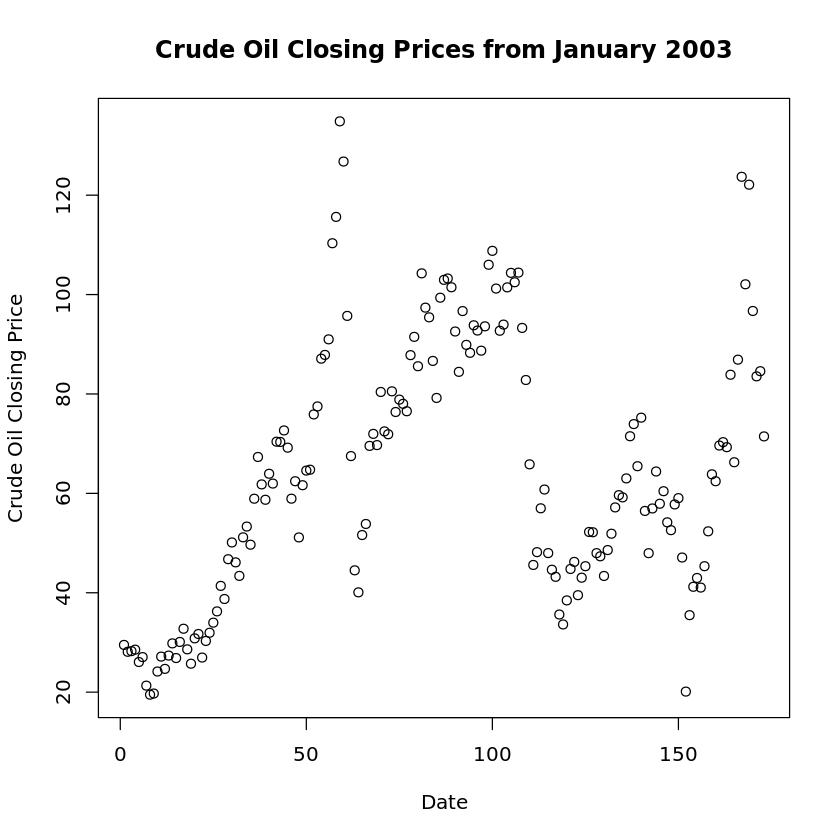

In [406]:
plot(close, main = "Crude Oil Closing Prices from January 2003", ylab="Crude Oil Closing Price", xlab="Date")

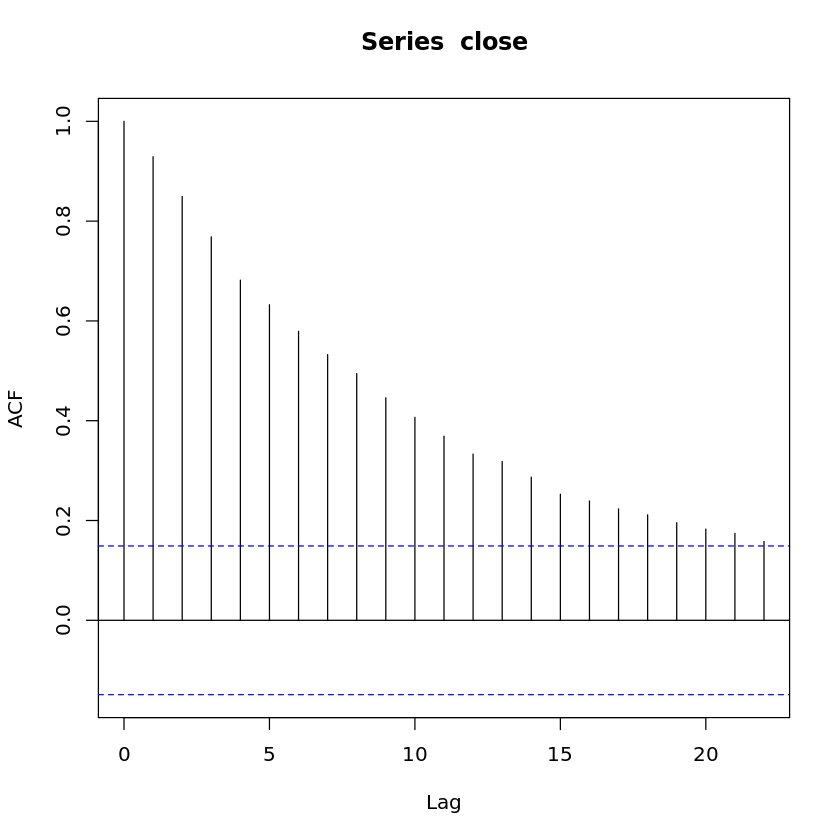

In [407]:
acf(close)


Call:
lm(formula = close ~ tt)

Residuals:
    Min      1Q  Median      3Q     Max 
-54.209 -22.096  -6.139  19.006  75.417 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  50.0060     3.7719  13.257  < 2e-16 ***
tt            0.1600     0.0376   4.254 3.45e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.7 on 171 degrees of freedom
Multiple R-squared:  0.0957,	Adjusted R-squared:  0.09041 
F-statistic:  18.1 on 1 and 171 DF,  p-value: 3.451e-05


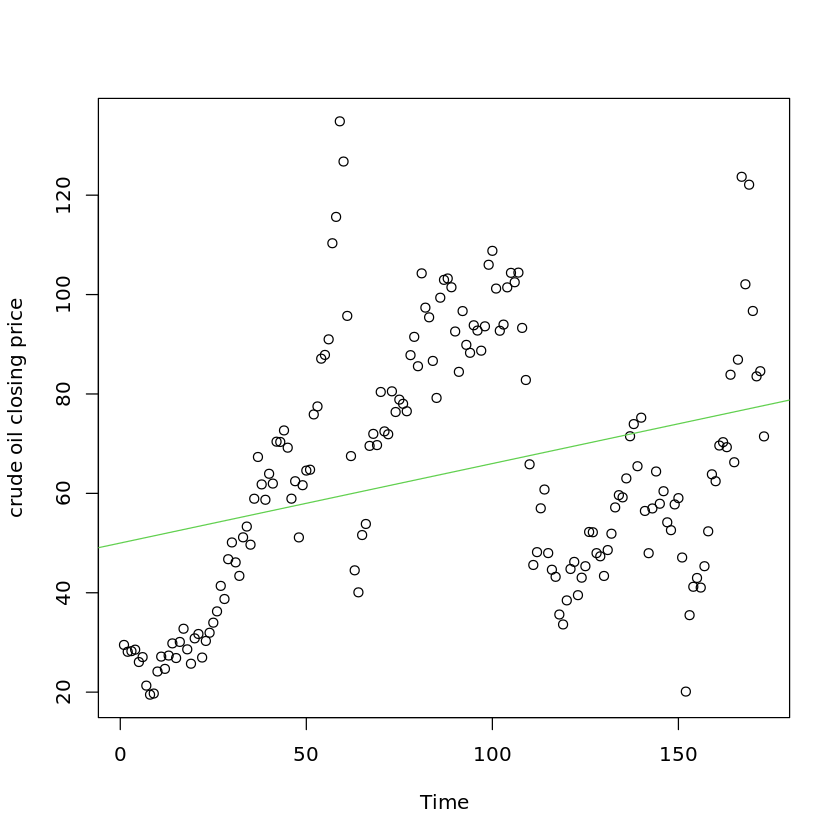

In [408]:
#fit linear regression
tt<- 1:NROW(crudeoil) #create time variable
fit1<- lm(close~ tt)
summary(fit1)

##plot the model
plot(tt, close, xlab="Time", ylab="crude oil closing price")
abline(fit1, col=3)


	Durbin-Watson test

data:  fit1
DW = 0.14491, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


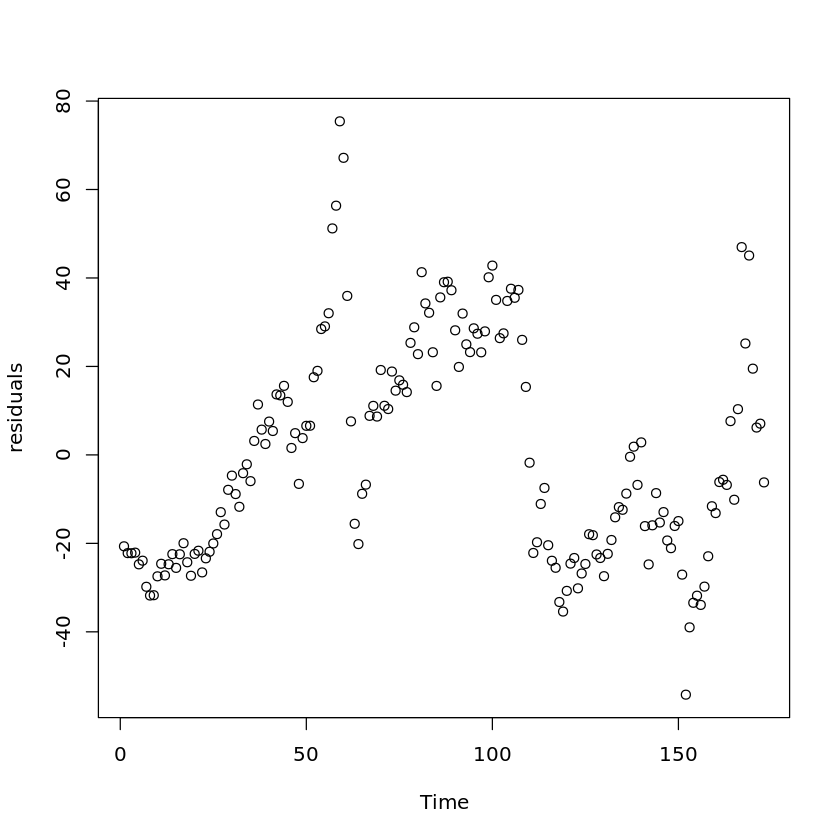

In [409]:
##check the residuals? are they autocorrelated? Test of DW
dwtest(fit1)

##check the residuals
resfit1<- residuals(fit1)
plot(resfit1,xlab="Time", ylab="residuals" )


Call:
tslm(formula = close.ts ~ trend)

Residuals:
    Min      1Q  Median      3Q     Max 
-54.209 -22.096  -6.139  19.006  75.417 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  50.0060     3.7719  13.257  < 2e-16 ***
trend         0.1600     0.0376   4.254 3.45e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.7 on 171 degrees of freedom
Multiple R-squared:  0.0957,	Adjusted R-squared:  0.09041 
F-statistic:  18.1 on 1 and 171 DF,  p-value: 3.451e-05



	Durbin-Watson test

data:  fitts
DW = 0.14491, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


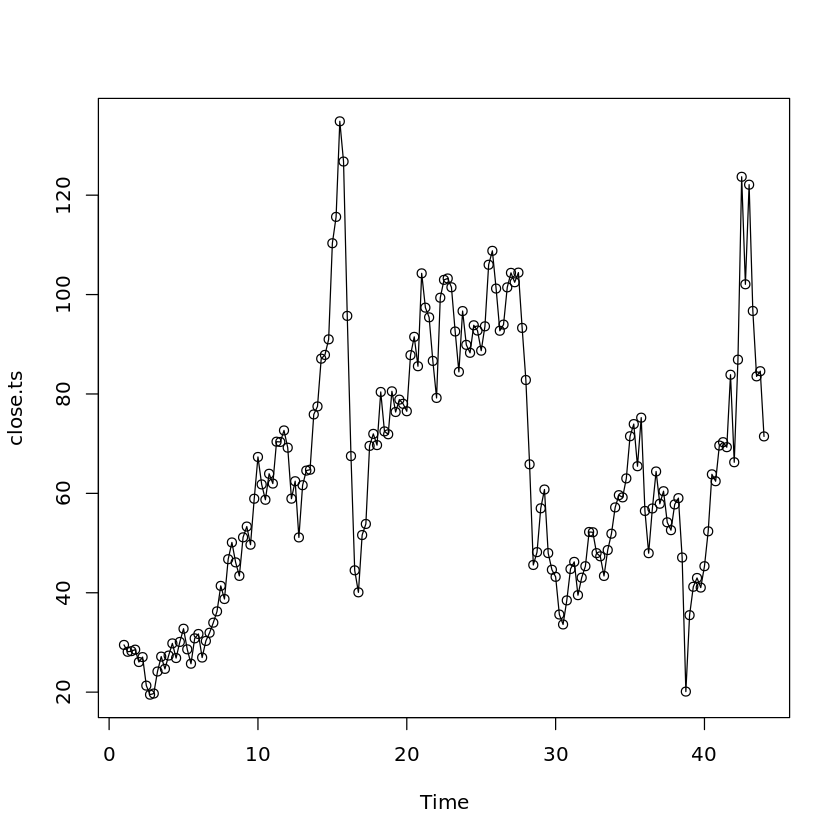

In [410]:
##let us do the same with a linear model for time series, so we transform the data into a ts object
close.ts <- ts(close, frequency = 4)
ts.plot(close.ts, type="o")

## we fit a linear model with the tslm function
fitts<- tslm(close.ts~trend)

###obviously it gives the same results of the first model
summary(fitts)

dwtest(fitts)


Call:
tslm(formula = close.ts ~ trend + season)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.895 -21.868  -6.235  18.802  75.450 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 50.20825    5.00046  10.041  < 2e-16 ***
trend        0.16000    0.03794   4.217 4.03e-05 ***
season2     -0.06888    5.34332  -0.013    0.990    
season3     -0.23772    5.34318  -0.044    0.965    
season4     -0.52306    5.34332  -0.098    0.922    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.92 on 168 degrees of freedom
Multiple R-squared:  0.09576,	Adjusted R-squared:  0.07423 
F-statistic: 4.448 on 4 and 168 DF,  p-value: 0.001924



	Durbin-Watson test

data:  fit2
DW = 0.14455, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


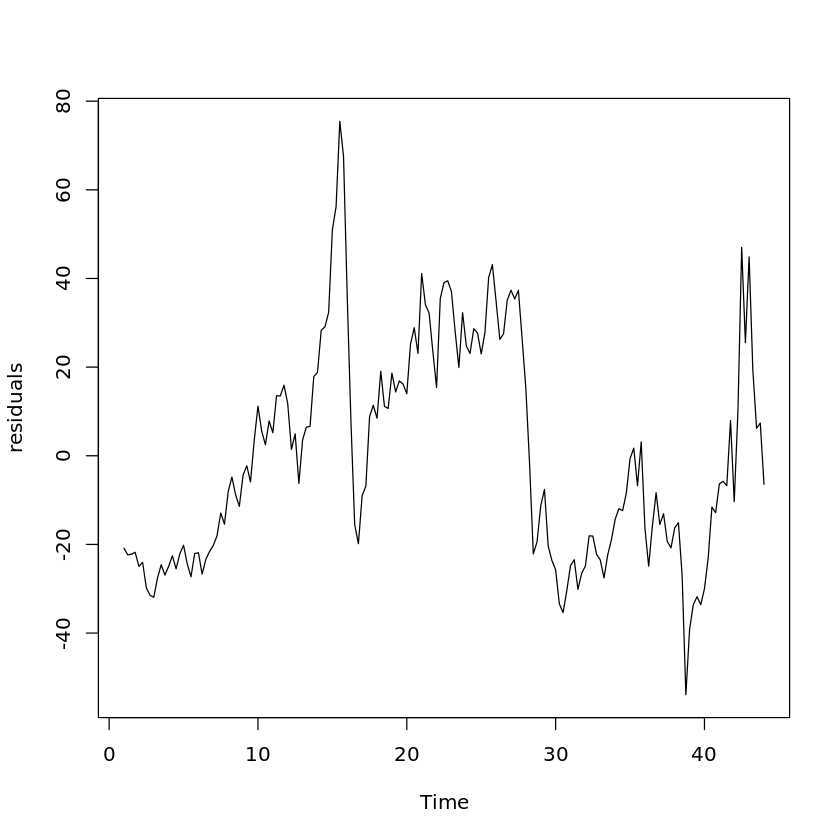

In [411]:
#Model with trend and seasonality
fit2 <- tslm(close.ts~ trend + season)
summary(fit2)

#check the residuals
res2 <- residuals(fit2)

plot(res2, ylab="residuals")
dwtest(fit2)

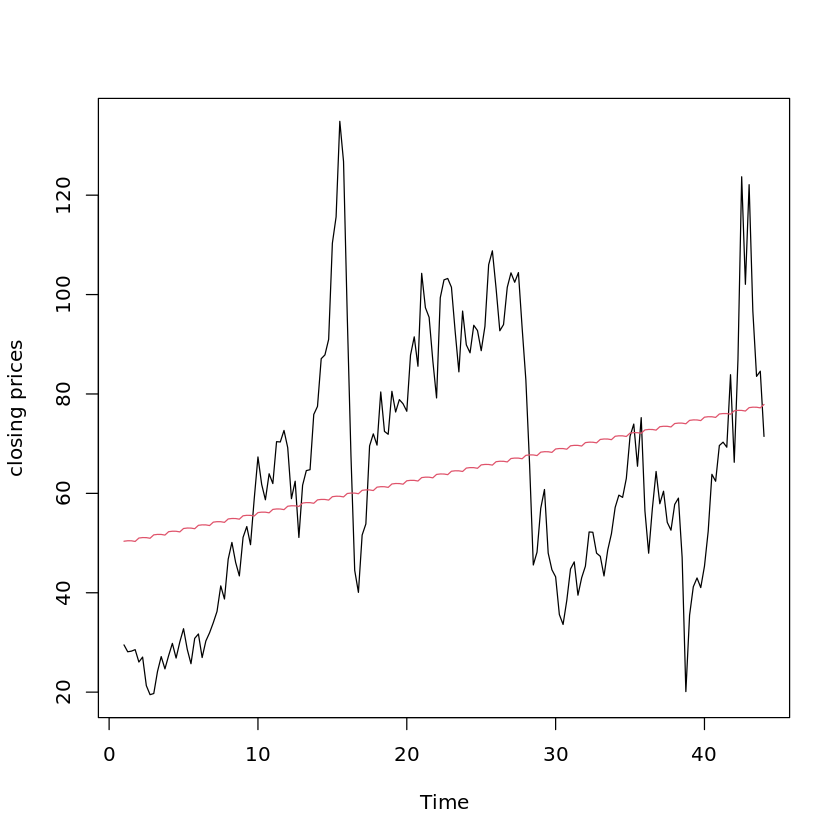

In [412]:
###plot of the model
plot(close.ts, ylab="closing prices", xlab="Time")
lines(fitted(fit2), col=2)

Call: ( Standard Bass Model )

  BM(series = close, display = T)

Residuals:
    Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-277.10 -142.94  -31.87  -15.46   73.29  645.94 

Coefficients:
       Estimate    Std.Error        Lower        Upper   p-value    
m 1.145422e+04 9.928419e+01 1.125963e+04 1.164881e+04 2.26e-163 ***
p 2.165790e-03 4.501733e-05 2.077557e-03 2.254022e-03 6.21e-101 ***
q 2.601813e-02 5.816873e-04 2.487805e-02 2.715822e-02  6.05e-96 ***
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  166.3512  on  170  degrees of freedom
 Multiple R-squared:   0.9992728  Residual squared sum:  4801034

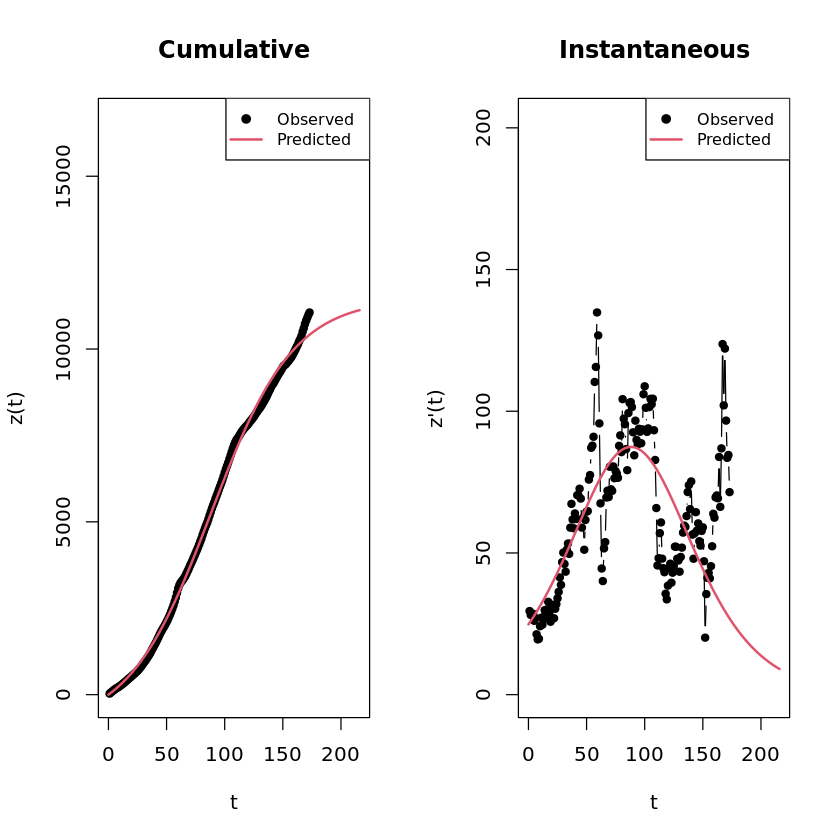

In [413]:
###we estimate a simple Bass Model 
bm<-BM(close,display = T)
summary(bm)

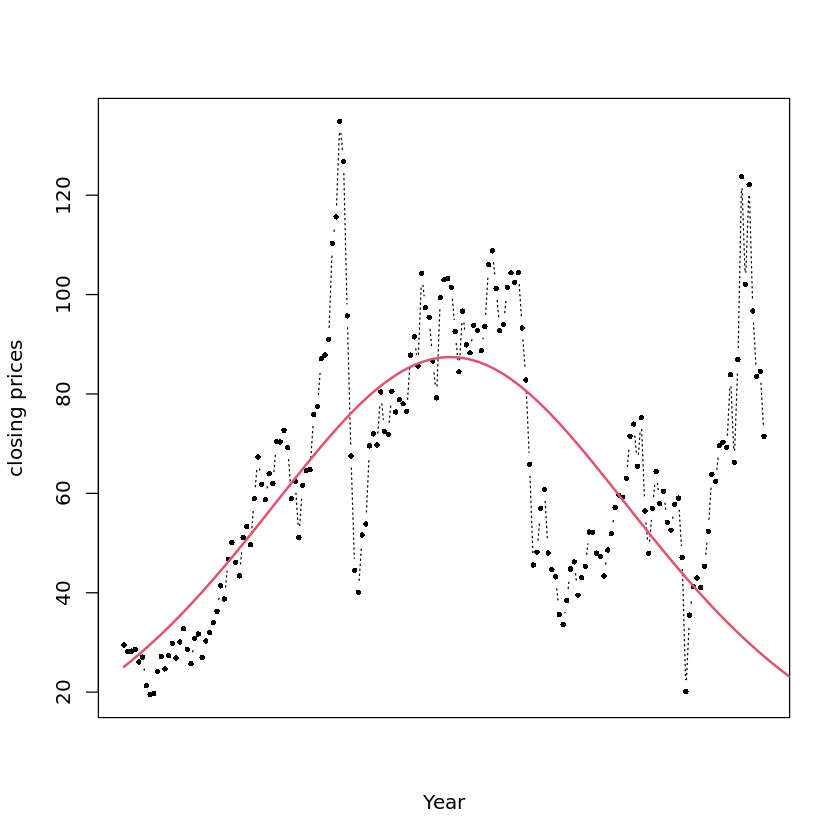

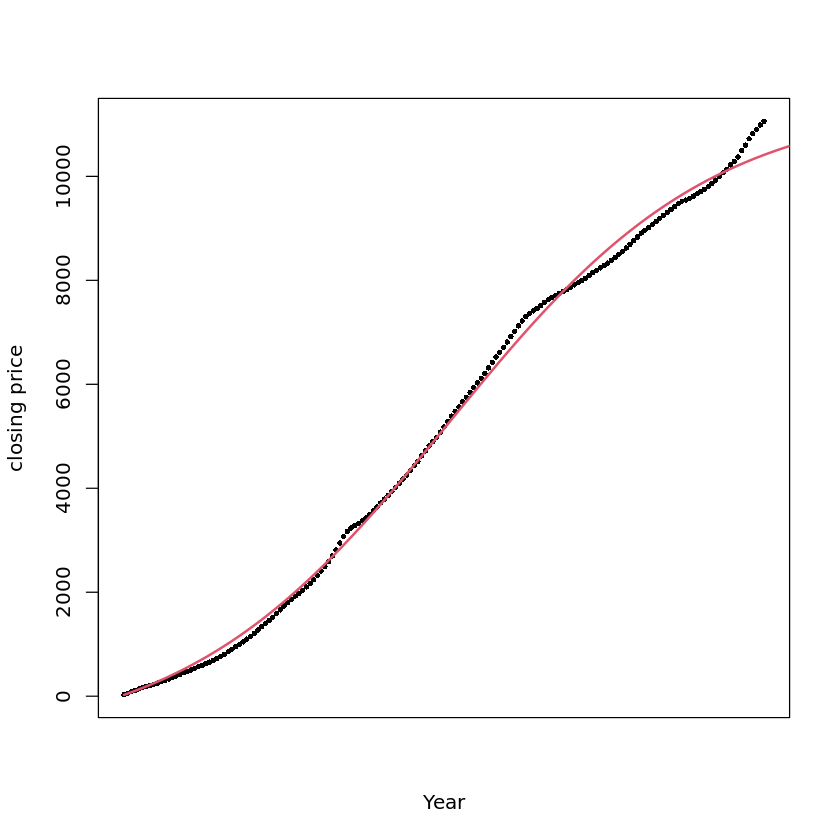

In [414]:
###prediction (out-of-sample)
pred_bm<- predict((bm), newx=c(1:210))
pred.inst<- make.instantaneous(pred_bm)

###plot of fitted model 
plot(close, type= "b",xlab="Year", ylab="closing prices",  pch=16, lty=3, xaxt="n", cex=0.6)
lines(pred.inst, lwd=2, col=2)

plot(cumsum(close), type= "b",xlab="Year", ylab="closing price",  pch=16, lty=3, xaxt="n", cex=0.6)
lines(pred_bm, lwd=2, col=2)

In [415]:
crudeoil<- crudeoil %>% filter(row_number() %% 2 != 0)
close <- crudeoil$Close

Call: ( Standard Bass Model )

  BM(series = close, display = T)

Residuals:
     Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-140.459  -81.007  -20.791   -8.447   38.528  323.214 

Coefficients:
       Estimate    Std.Error        Lower        Upper  p-value    
m 5.786448e+03 7.668866e+01 5.636141e+03 5.936756e+03 5.87e-79 ***
p 4.322113e-03 1.350386e-04 4.057442e-03 4.586784e-03 7.90e-49 ***
q 5.124119e-02 1.745482e-03 4.782010e-02 5.466227e-02 6.23e-46 ***
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  89.54213  on  84  degrees of freedom
 Multiple R-squared:   0.9991641  Residual squared sum:  695738.5

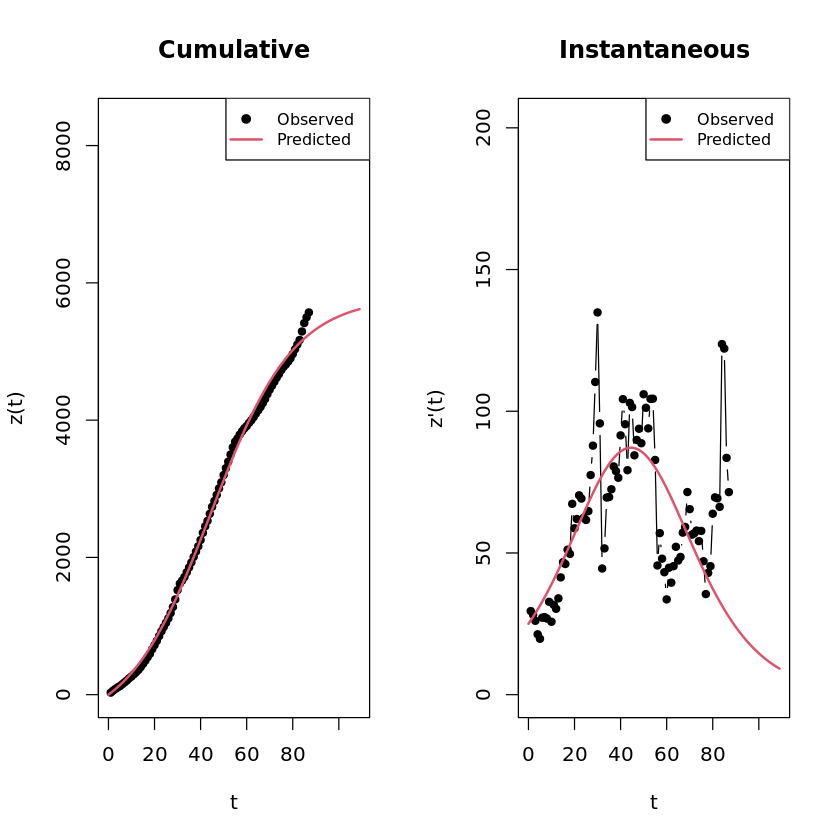

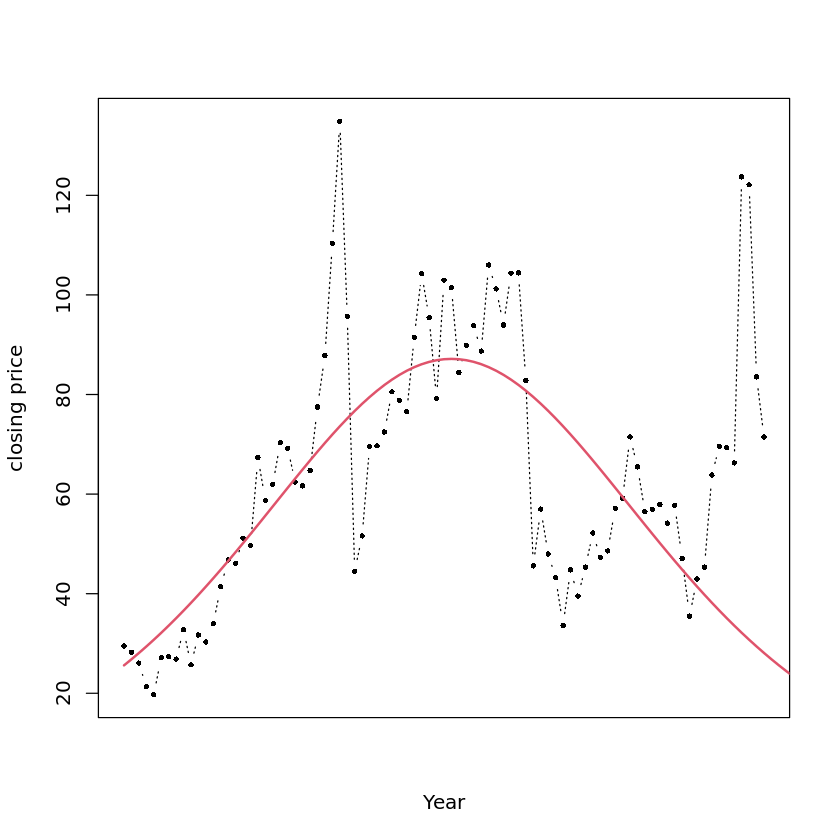

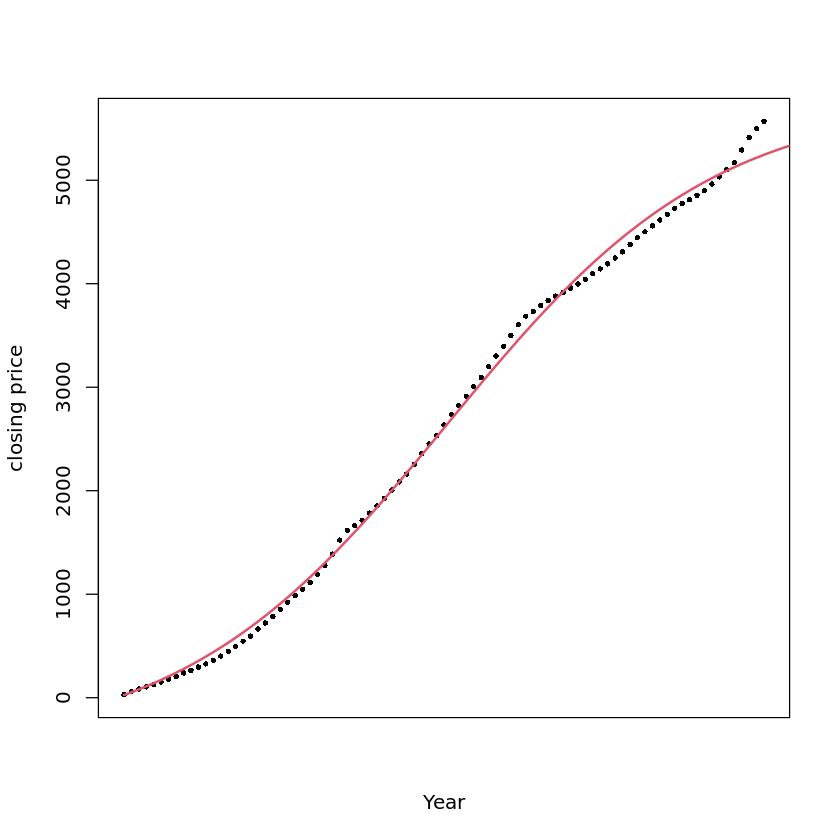

In [416]:
###we estimate the model with 50% of the data
bm_50<-BM(close,display = T)
summary(bm_50)

pred_bm50<- predict(bm_50, newx=c(1:100))
pred.inst50<- make.instantaneous(pred_bm50)

plot(close, type= "b",xlab="Year", ylab="closing price",  pch=16, lty=3, xaxt="n", cex=0.6)
lines(pred.inst50, lwd=2, col=2)

plot(cumsum(close), type= "b",xlab="Year", ylab="closing price",  pch=16, lty=3, xaxt="n", cex=0.6)
lines(pred_bm50, lwd=2, col=2)

In [417]:
crudeoil<- crudeoil %>% filter(row_number() %% 2 != 0)
close <- crudeoil$Close

Call: ( Standard Bass Model )

  BM(series = close, display = T)

Residuals:
    Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-67.481 -41.172 -14.792  -4.402  17.395 143.173 

Coefficients:
       Estimate    Std.Error        Lower        Upper  p-value    
m 2.977179e+03 5.646154e+01 2.866516e+03 3.087842e+03 2.65e-39 ***
p 8.634724e-03 3.655379e-04 7.918283e-03 9.351165e-03 1.71e-25 ***
q 9.869671e-02 4.746822e-03 8.939311e-02 1.080003e-01 2.15e-23 ***
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  44.50979  on  41  degrees of freedom
 Multiple R-squared:   0.9991952  Residual squared sum:  86040.81

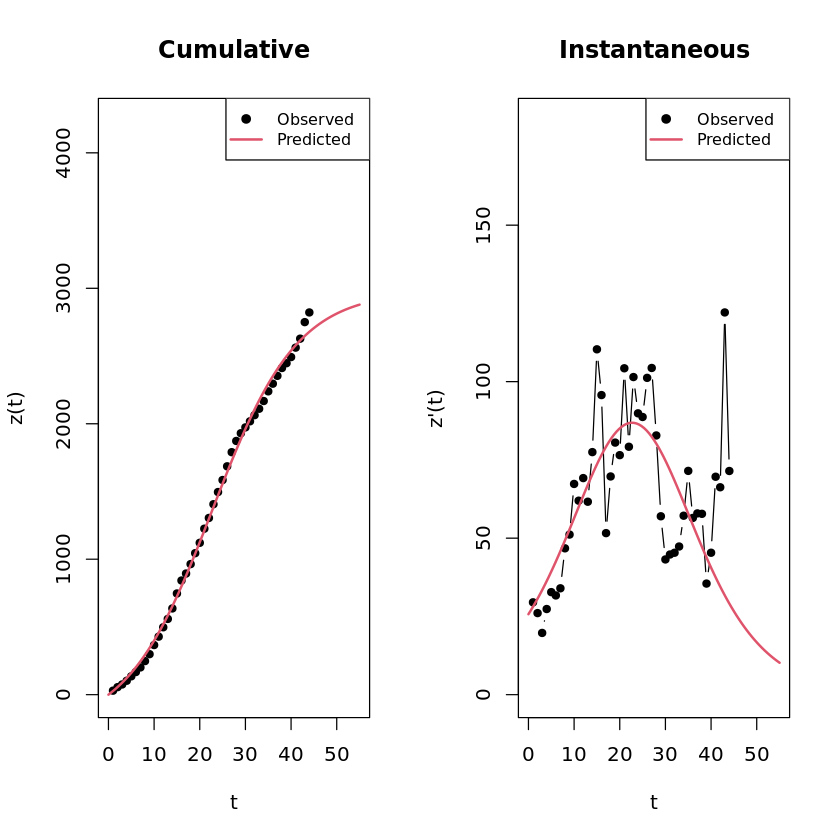

In [418]:
###we estimate the model with 25% of the data
bm_75<-BM(close,display = T)
summary(bm_75)

pred_bm75<- predict(bm_75, newx=c(1:45))
pred.inst75<- make.instantaneous(pred_bm75)

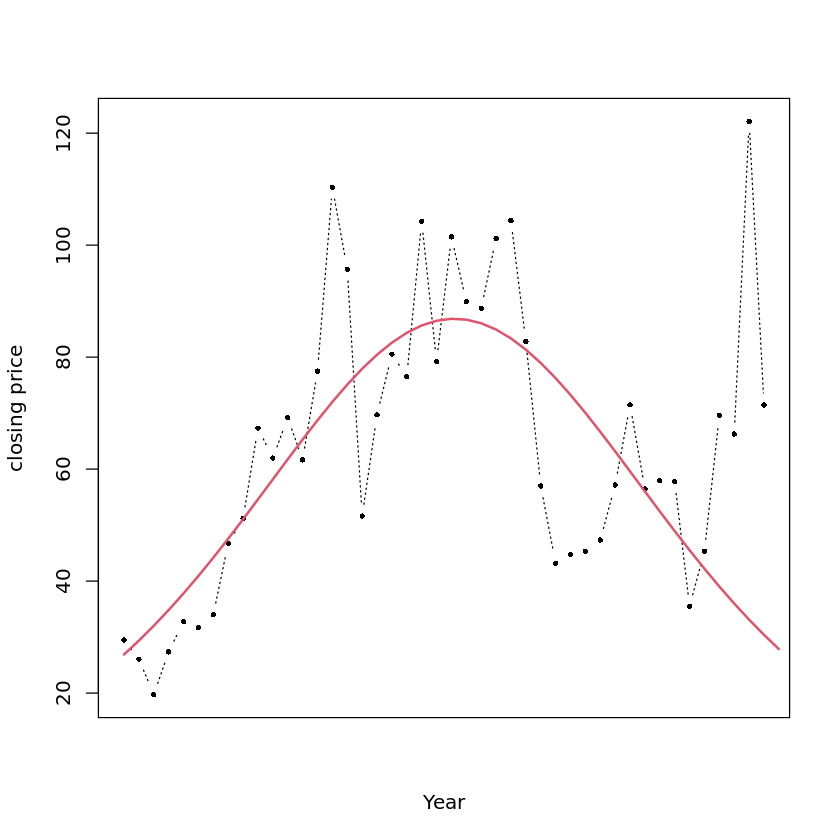

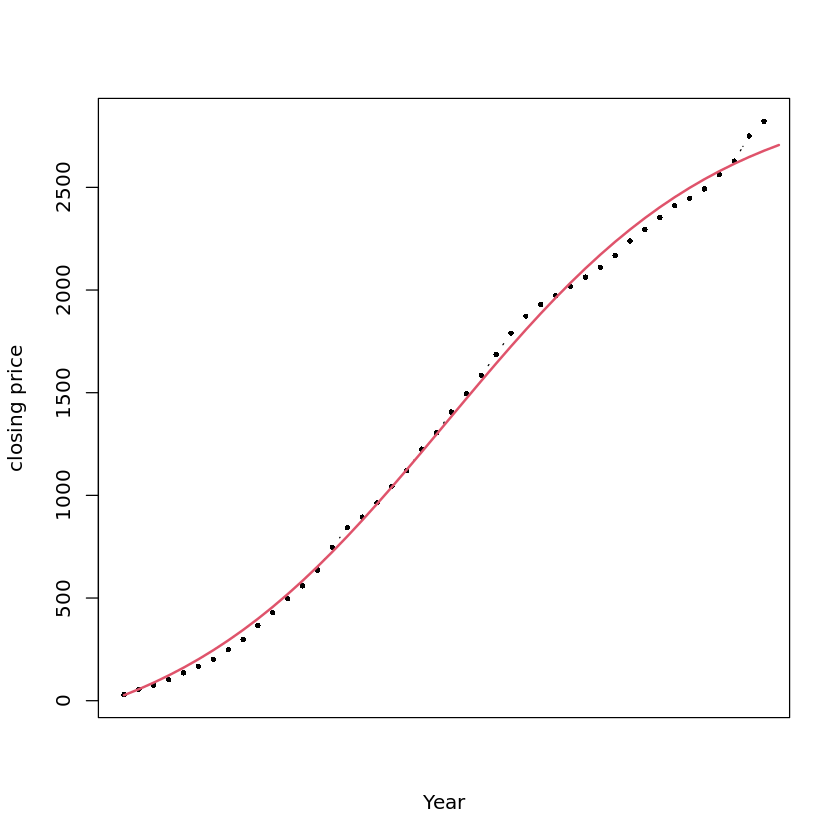

In [419]:
###Comparison between models (instantaneous)
###instantaneous
plot(close, type= "b",xlab="Year", ylab="closing price",  pch=16, lty=3, xaxt="n", cex=0.6)
lines(pred.inst75, lwd=2, col=2)



###Comparison between models (cumulative)
plot(cumsum(close), type= "b",xlab="Year", ylab="closing price",  pch=16, lty=3, xaxt="n", cex=0.6)
lines(pred_bm75, lwd=2, col=2)


Call: ( Generalized Bass model with 1  Rectangular  shock )

  GBM(series = close, shock = "rett", nshock = 1, prelimestimates = c(44633.68, 
    0.00192356, 0.09142022, 24, 38, -0.1))

Residuals:
    Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-35.944 -16.769  -3.330  -2.343   9.699  59.714 

Coefficients:
           Estimate    Std.Error         Lower         Upper  p-value    
m     3.757562e+03 2.024755e+02 3360.71756848  4.154407e+03 1.20e-20 ***
p     6.630601e-03 2.876789e-04    0.00606676  7.194441e-03 6.15e-24 ***
q     9.378093e-02 3.803692e-03    0.08632583  1.012360e-01 5.55e-25 ***
a1    2.680155e+01 3.667927e-01   26.08265007  2.752045e+01 1.76e-42 ***
b1    4.025409e+01 6.925064e-01   38.89680207  4.161138e+01 9.74e-39 ***
c1   -4.421487e-01 3.081411e-02   -0.50254325 -3.817542e-01 6.36e-17 ***
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  19.77298  on  38  degrees of freedom
 Multiple R-squared:   0.9995138  Residual sq

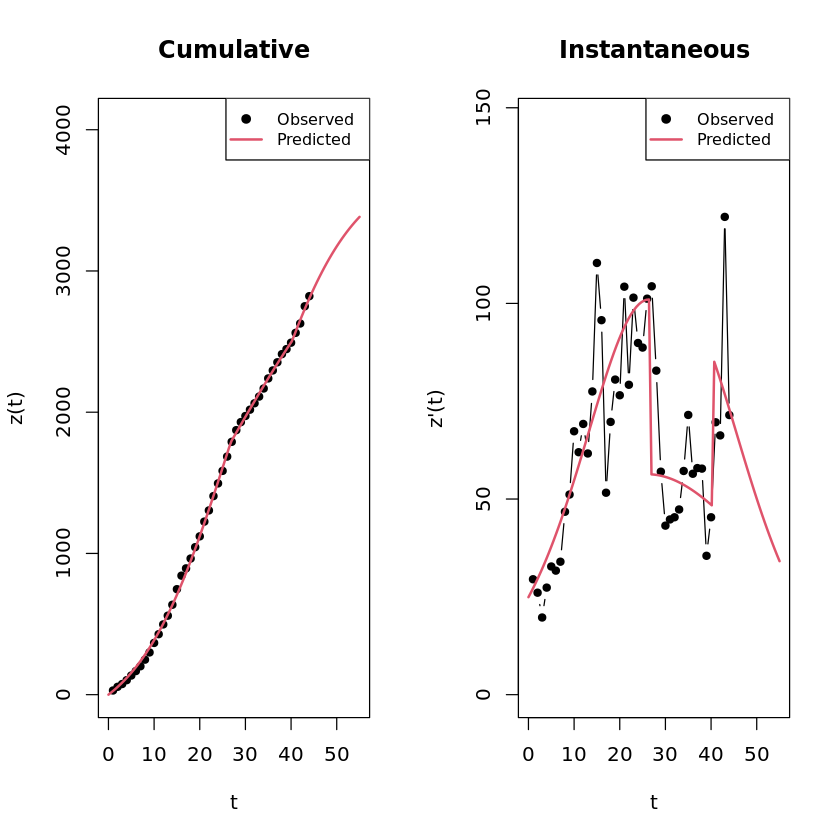

Call: ( Generalized Bass model with 1  Exponential  shock )

  GBM(series = close, shock = "exp", nshock = 1, prelimestimates = c(44633.68, 
    0.00192356, 0.09142022, 12, -0.1, 0.1))

Residuals:
     Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-53.9305 -26.0790 -10.1392  -0.5683  18.1252  84.0073 

Coefficients:
           Estimate    Std.Error         Lower        Upper  p-value    
m     2.637934e+04 1.053415e+06 -2.038275e+06 2.091034e+06 9.80e-01    
p     1.171902e-03 4.813764e-02 -9.317614e-02 9.551994e-02 9.81e-01    
q    -9.327358e-03 5.330430e-03 -1.977481e-02 1.120092e-03 8.82e-02   .
a1    9.675698e+00 5.403768e-01  8.616579e+00 1.073482e+01 4.08e-20 ***
b1    3.885826e-02 1.854146e-01 -3.245477e-01 4.022642e-01 8.35e-01    
c1    2.191083e+00 1.302678e+00 -3.621187e-01 4.744284e+00 1.01e-01    
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  36.43928  on  38  degrees of freedom
 Multiple R-squared:   0.9983716  Residu

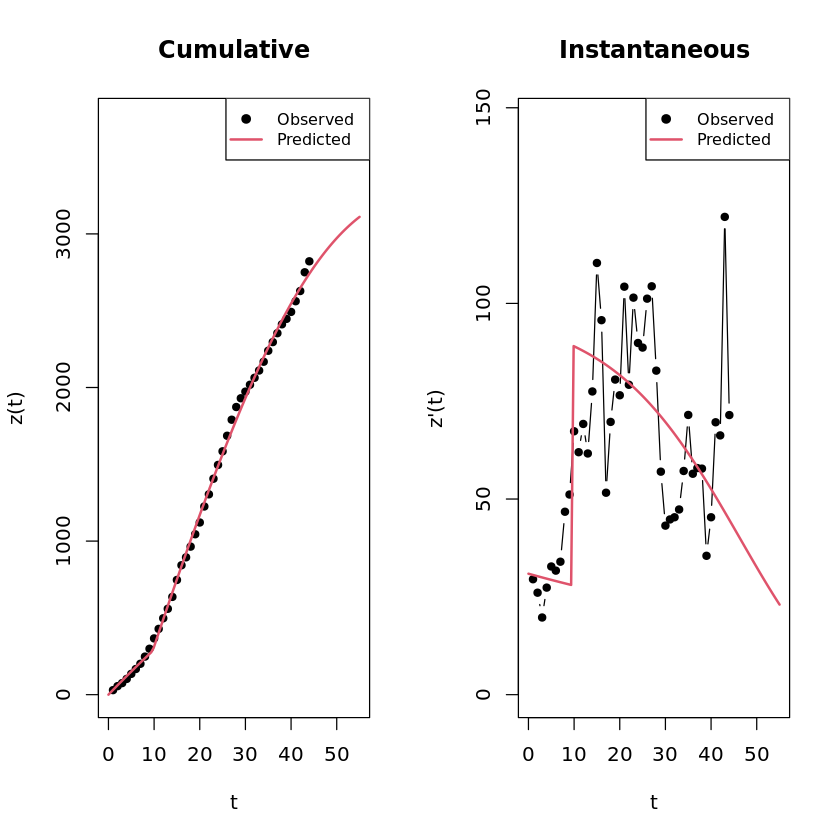

Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”


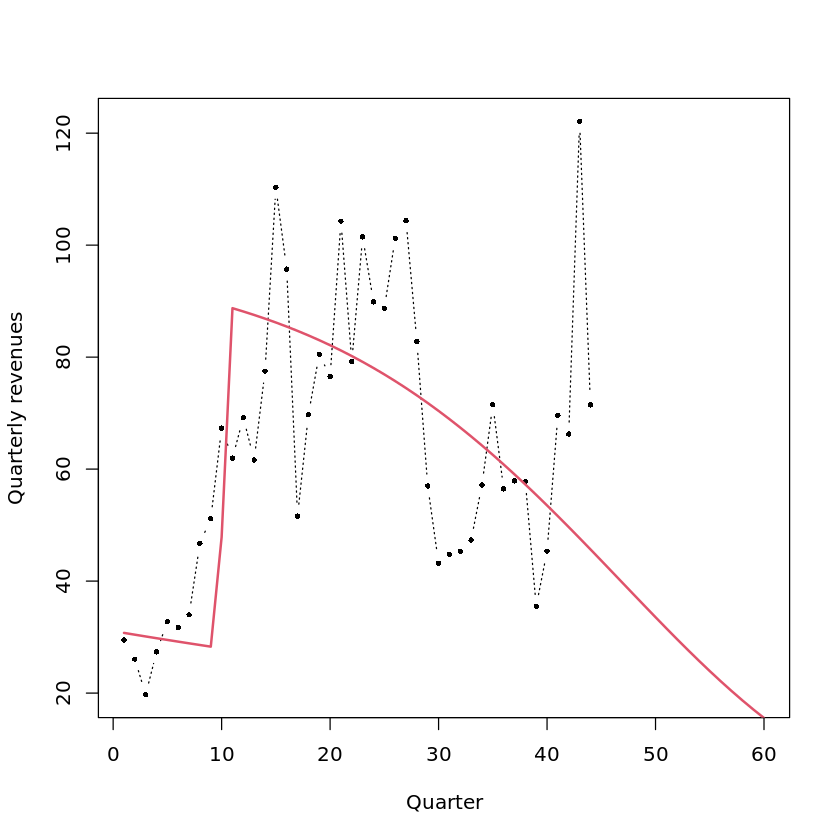

Call: ( Guseo Guidolin Model )

  GGM(series = close, prelimestimates = c(44633.68, 0.001, 0.01, 
    0.00192356, 0.09142022))

Residuals:
    Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-103.28  -64.17  -20.28  -13.29   15.07  139.47 

Coefficients:
           Estimate    Std.Error         Lower        Upper p-value  
K     1.639633e+05 1.599573e+09 -3.134941e+09 3.135269e+09       1  
pc    2.476946e-03 2.930534e+02 -5.743716e+02 5.743765e+02       1  
qc   -1.529531e-02 1.608720e+02 -3.153186e+02 3.152880e+02       1  
ps    2.065177e-03 1.422732e+02 -2.788483e+02 2.788524e+02       1  
qs   -1.712696e-02 7.635832e+01 -1.496767e+02 1.496424e+02       1  
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  66.75439  on  39  degrees of freedom
 Multiple R-squared:   0.9943149  Residual squared sum:  199384.5

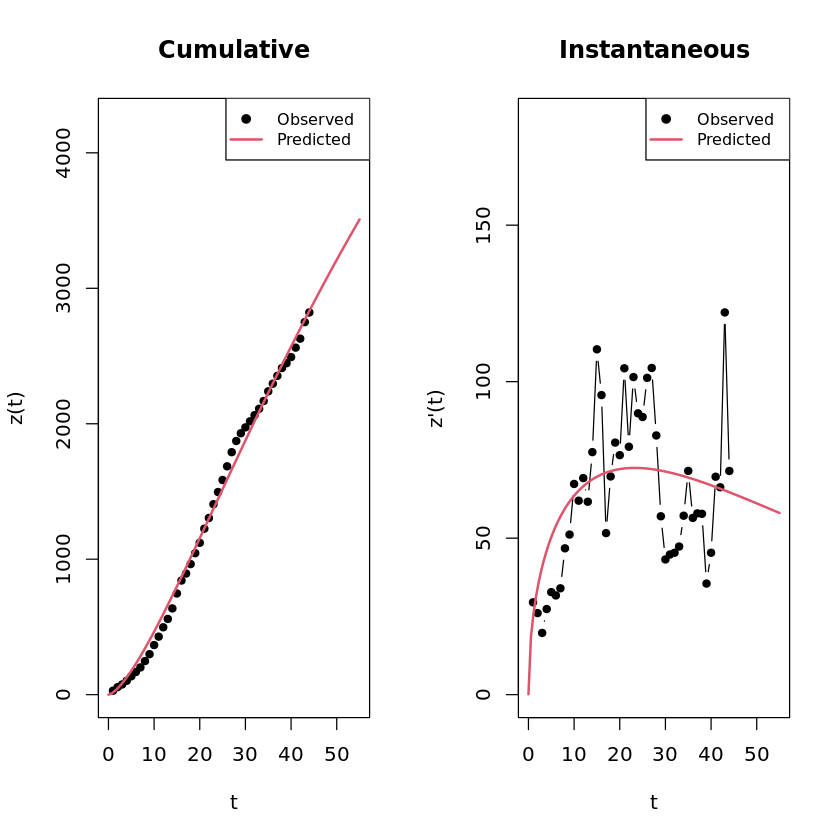

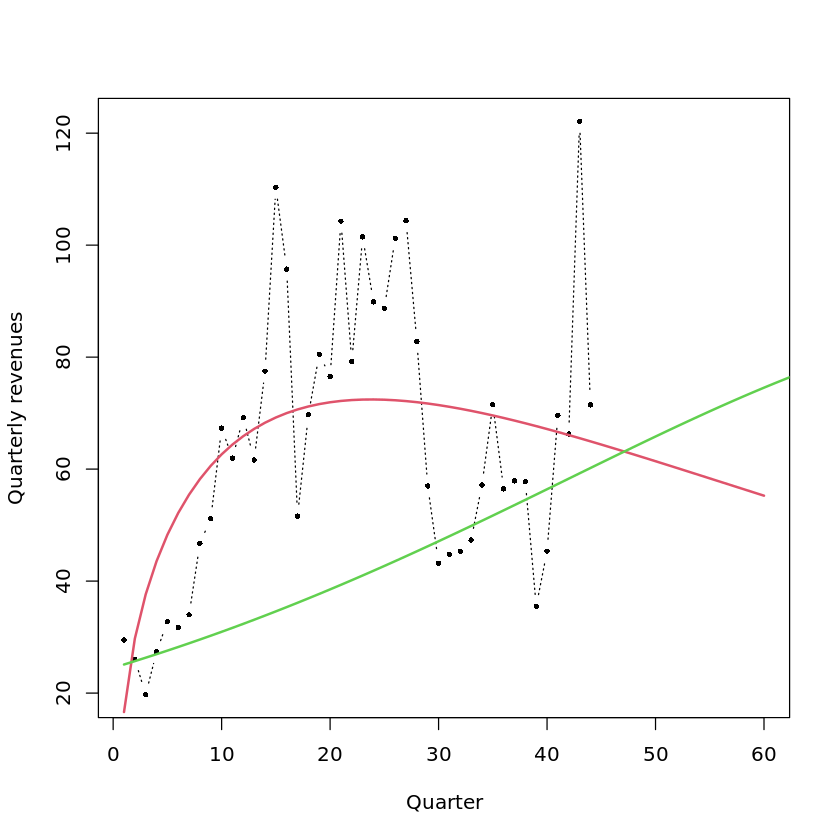

In [424]:
###GBMr1  
#25% of data
GBMr1<- GBM(close,shock = "rett",nshock = 1,prelimestimates = c(4.463368e+04, 1.923560e-03, 9.142022e-02, 24,38,-0.1))
summary(GBMr1)

######GBMe1

GBMe1<- GBM(close,shock = "exp",nshock = 1,prelimestimates = c(4.463368e+04, 1.923560e-03, 9.142022e-02, 12,-0.1,0.1))
summary(GBMe1)

pred_GBMe1<- predict(GBMe1, newx=c(1:50))
pred_GBMe1.inst<- make.instantaneous(pred_GBMe1)

plot(close, type= "b",xlab="Quarter", ylab="Quarterly revenues",  pch=16, lty=3, cex=0.6, xlim=c(1,60))
lines(pred_GBMe1.inst, lwd=2, col=2)


######GGM 
GGM<- GGM(close, prelimestimates=c(4.463368e+04, 0.001, 0.01, 1.923560e-03, 9.142022e-02))
summary(GGM)

pred_GGM<- predict(GGM, newx=c(1:50))
pred_GGM.inst<- make.instantaneous(pred_GGM)

plot(close, type= "b",xlab="Quarter", ylab="Quarterly revenues",  pch=16, lty=3, cex=0.6, xlim=c(1,60))
lines(pred_GGM.inst, lwd=2, col=2)
lines(pred.inst, lwd=2, col=3)
